In [2]:
import json
import requests
import sys
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://api.yelp.com/v3/businesses/search'

In [4]:

client_id='xE4kok90S-xFwr7MHBHfVA'

api_key='h0lgHlxjtHAaKq3hStUCvENBTgnKrlKvNLW64QxKW1RJlplyYPaG8VKIaE9JcajqI0ME92y9BEOJ5h18J2SCw-YrwlZ1-aA_UYGR3fRcggWrbgu15nBdlfTuNLQyYHYx'

In [5]:
headers = {'Authorization':'Bearer {}'.format(api_key),}

In [6]:
term= 'restaurants'
location='Austin'
categories='pizza'

In [7]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "categories" : categories,
                "limit": 50,
    
            }

In [8]:
def yelp_call(url_params, api_key):
    
    response= requests.get(url, headers=headers, params=url_params)  
    
    if response.status_code==200:
        return response.json()
     
    else: 
        return response.status_code
    


In [9]:
def parse_results(results):
    parsed_results =[]
    for biz in results:
        if 'price' not in biz:
            biz['price']= np.nan
        biz_info= ( biz['id'],
                   biz['name'],
                   biz['rating'],
                   biz['review_count'],
                   biz['price'],
                   )
        parsed_results.append(biz_info)
    
    return parsed_results



In [10]:
def df_save(csv_filepath, parsed_results):
    
    
    pr_df= pd.DataFrame(parsed_results, columns= 
             ['business_id','biz_name', 'biz_rating', 'biz_review_count', 'biz_price'])
    
    pr_csv=pr_df.to_csv(path_or_buf=csv_filepath, mode="a", header=False)
   
    return print("Results added!")
   

In [11]:
# create a variable  to keep track of which result you are in. 
cur = 0

#set up a while loop to go through and grab the result 
while cur < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = cur
    #make your API call with the new offset number
    results =  yelp_call(url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    new_parsed_results = parse_results(results['businesses'])
    
    # use your function to insert your parsed results into the db
    df_save('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_data_pizza', new_parsed_results)
    
    #increment the counter by 50 to move on to the next results
    cur += 50

Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!


In [12]:
pizza_data= pd.read_csv('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_data_pizza', header=0, 
                       names=['business_id','biz_name', 'biz_rating', 'biz_review_count', 'biz_price']).reset_index(drop=True)

In [13]:
pizza_index= pizza_data[pizza_data['business_id']== 'business_id'].index
pizza_data.drop(pizza_index, inplace=True)
Pizza_data = pizza_data
Pizza_data

,business_id,biz_name,biz_rating,biz_review_count,biz_price
0,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,450,$$
1,raXi6598v97VVJGxuet_ZQ,Cucina on 35th,4.0,217,$$
2,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,$$
3,lnxDPi7QcCqp733mTOJcZA,Bufalina Due,4.0,124,$$
4,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,17,NaN
...,...,...,...,...,...
184,oSgSc5DkIbROamnRvdFQdA,Pizza Hut,1.5,63,$
185,DzoA4WmoAMKLo4rrxNfRVQ,Pizza Hut,1.5,34,$
186,OByeJPOz-WEENn1HuMVCtQ,Domino's Pizza,2.5,46,$
187,dXVHhocSRZpn9EWHFPHzfg,Little Caesars Pizza,1.0,4,$


In [14]:
pizza_biz_ids=Pizza_data.loc[:,'business_id'].to_list()
pizza_biz_ids_lst=list(set(pizza_biz_ids))

In [15]:
def yelp_call_reviews(url_review, api_key):
    response= requests.get(url_reviews, headers=headers)  
    if response.status_code==200:
        return response.json()
    else: 
        return response.status_code

In [16]:
def parse_reviews(bid, reviews):
    parsed_reviews =[]
    for review in reviews:
        review_info= ( bid,
                    review['id'],
                    review['text'],
                    review['rating'] 
                           )
        parsed_reviews.append(review_info)
        
    return parsed_reviews

In [17]:
def df_save_reviews(csv_filepath, parsed_reviews):
    
    
    pr_df= pd.DataFrame(parsed_reviews, columns= 
             ['business_id','id','text', 'rating'])
    
    pr_csv=pr_df.to_csv(path_or_buf=csv_filepath, mode="a", header=False)
   
    return print("Results added!")

In [18]:
for bid in pizza_biz_ids_lst:
# #     print(bid)
    url_reviews='https://api.yelp.com/v3/businesses/' + bid + '/reviews'
    url_data = yelp_call_reviews(url_reviews, api_key)
    new_reviews = yelp_call_reviews(bid, api_key)
    #after you get your results you can now use your function to parse those results
    new_parsed_reviews = parse_reviews(bid, new_reviews['reviews'])
     # use your function to insert your parsed results into the db
    df_save_reviews('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_reviews_pizza', new_parsed_reviews)

Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results ad

In [19]:
Reviews_csv=pd.read_csv('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_reviews_pizza', 
            names=['business_id','review_id', 'text', 'rating']).reset_index(drop=True)

In [20]:
Reviews_csv

,business_id,review_id,text,rating
0,XSfZSHdhyCLgVbomTnmadw,tJb2xgA_ss_mUJEtxvLuKA,South Flo Pizza is located right inside the en...,5
1,XSfZSHdhyCLgVbomTnmadw,OVxw_cN1doE-hz1YXOvUcA,Have had this place bookmarked for a long time...,3
2,XSfZSHdhyCLgVbomTnmadw,NSiUwCK3NlusaVufMCQixg,I had the Spicy Hawaiian and liked it! They ba...,5
3,8sEbM_ACHUbBsZ-TRZFXWA,_HVlihnf-vABOOHcLUKy-g,"A favorite, one of my go-to pizza places. I've...",5
4,8sEbM_ACHUbBsZ-TRZFXWA,Q4DZ0as-PLwyBlNpgIcN5A,I cannot believe I keep forgetting to review H...,5
...,...,...,...,...
544,1Eq16r_MSnvPsnIykBdy9w,NqNe89aIfQV8hFZEG8KlrA,[covid review]\nExceptional service! I got a c...,5
545,1Eq16r_MSnvPsnIykBdy9w,lg-H_1OcASgtk2VXbH4XRw,My boyfriend is a true New Yorker. Since we ha...,5
546,gYIZEzeIgPNPNZsL9qbcvg,Y6GsFl1yTo8o4r3zGXPvqg,Very nice place to spend a few hours with the ...,4
547,gYIZEzeIgPNPNZsL9qbcvg,iXAPVo-egELQRPzWhp3f0g,They have made some improvements since the las...,4


In [21]:
term_two= 'restaurants'
location_two='Austin'
categories_two='tacos'

In [22]:
url_params_two = {
                "term": term_two.replace(' ', '+'),
                "location": location_two.replace(' ', '+'),
                "categories" : categories_two,
                "limit": 50,
                }

In [55]:
# create a variable  to keep track of which result you are in. 
cur_two = 0

#set up a while loop to go through and grab the result 
while cur_two < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params_two['offset'] = cur_two
    #make your API call with the new offset number
    results_two =  yelp_call(url_params_two, api_key)
    
    #after you get your results you can now use your function to parse those results
    new_parsed_results_two = parse_results(results_two['businesses'])
    
    # use your function to insert your parsed results into the db
    df_save('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_data_taco', new_parsed_results_two)
    
    #increment the counter by 50 to move on to the next results
    cur_two += 50

Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!


In [56]:
taco_data= pd.read_csv('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_data_taco',
                       names=['business_id','biz_name', 'biz_rating', 'biz_review_count', 'biz_price']).reset_index(drop=True)
taco_index= taco_data[taco_data['business_id']== 'business_id'].index
taco_data.drop(taco_index, inplace=True)
Taco_data = taco_data
taco_biz_ids= Taco_data.loc[:,'business_id'].to_list()
taco_biz_ids_lst= list(set(taco_biz_ids))
Taco_data

,business_id,biz_name,biz_rating,biz_review_count,biz_price
0,ec6X_eh2wyzFLqHbApAsuw,Pepe’s Tacos,4.5,60,NaN
1,gXlrgQkkdCc9iESuRlN_Uw,La Tunita 512,5.0,82,$
2,eUD2rCO5pfus19UN34Cgzw,FoodHeads,4.5,543,$$
3,_1lwieLPTdvfbEStNTnzDg,Taco Flats,4.0,45,NaN
4,496M41oU_3EehWQZMTkCgw,Lady Elaine,5.0,2,NaN
...,...,...,...,...,...
136,5N4bHv9sTm1JsDqhDWz-tA,Jack in the Box,2.5,18,$
137,NGYrEfaPyLhRvQvooa1cuQ,IBM Cafeteria,2.0,1,NaN
138,ehSTouF01blyKxwIxZQKjw,Jack in the Box,1.5,22,$
139,e8iaAO6ukGxUxhbzHS2LQg,Jack in the Box,2.0,47,$


In [57]:
Taco_data.iloc[140,:]

business_id         FwWVAykgrFME1jKs2ZmG_Q
biz_name                   Jack in the Box
biz_rating                               2
biz_review_count                        23
biz_price                                $
Name: 140, dtype: object

In [25]:
for bid in taco_biz_ids_lst:
# #     print(bid)
    url_reviews='https://api.yelp.com/v3/businesses/' + bid + '/reviews'
    url_data = yelp_call_reviews(url_reviews, api_key)
    new_reviews = yelp_call_reviews(bid, api_key)
    #after you get your results you can now use your function to parse those results
    new_parsed_reviews = parse_reviews(bid, new_reviews['reviews'])
     # use your function to insert your parsed results into the db
    df_save_reviews('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_reviews_taco', new_parsed_reviews)

Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results ad

In [58]:
Taco_reviews=pd.read_csv('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_reviews_taco', 
            names=['business_id','review_id', 'text', 'rating']).reset_index(drop=True)
Taco_reviews

,business_id,review_id,text,rating
0,e8iaAO6ukGxUxhbzHS2LQg,v4lai9Uec0nDLcFcfE1xaw,First time visit (drive-thru) and staff was fr...,3
1,e8iaAO6ukGxUxhbzHS2LQg,BstPEkCPGJLchD3tZ89G0g,I have come to this location a couple times in...,1
2,e8iaAO6ukGxUxhbzHS2LQg,XbMHg2yhbqkjmCzwIRv_Fw,Sign says the drive thru is open 24 hrs but at...,1
3,00K-UTXqg9iDoMXB3QXh0A,BZfZfjZC5qiSxo7f__luXw,Admittedly I came here on New Years Eve for so...,4
4,00K-UTXqg9iDoMXB3QXh0A,7pPj2CsC2FTxsMOQP-NCtA,Really enjoyed the food and drinks here on my ...,4
...,...,...,...,...
383,ec6X_eh2wyzFLqHbApAsuw,gFRWl4w9l0xyJFv1kAyxMg,"No frills, very oily, TASTY tacos! Get the thr...",5
384,ec6X_eh2wyzFLqHbApAsuw,C5AH1T54rqp8kzVW02LW4Q,The food was great! I got the taco combo with ...,5
385,X4FReQm8nmc3sON2aRoY1A,RPqjWASA0WIXFOrzB9YS0w,Late night tacos in my neighborhood and they d...,4
386,X4FReQm8nmc3sON2aRoY1A,rRHbhwsCTgxq8Dm0nFf9GA,Rachel is the best! Took great care of me and ...,5


## Part 4 -  Using python and pandas, write code to answer the questions below. 


- Which are the 5 most reviewed businesses in your dataset?
- What is the highest rating recieved in your data set and how many businesses have that rating?
- What percentage of businesses have a rating greater than or  4.5?
- What percentage of businesses have a rating less than 3?
- What percentage of your businesseshave a price label of one dollar sign? Two dollar signs? Three dollar signs? No dollar signs?
- Return the text of the reviews for the most reviewed business. 
- Find the highest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the most reviews. 
- Find the lowest rated business and return text of the most recent review.  If multiple business have the same rating, select the business with the least reviews. 


**Merged Business Data for Pizza with the Reviews Data**

In [59]:
merged_pizza = pd.merge(left=Pizza_data, right=Reviews_csv, left_on='business_id', right_on='business_id')
merged_pizza['category']= 'Pizza'


In [60]:
merged_pizza

,business_id,biz_name,biz_rating,biz_review_count,biz_price,review_id,text,rating,category
0,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,450,$$,_HVlihnf-vABOOHcLUKy-g,"A favorite, one of my go-to pizza places. I've...",5,Pizza
1,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,450,$$,Q4DZ0as-PLwyBlNpgIcN5A,I cannot believe I keep forgetting to review H...,5,Pizza
2,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,450,$$,p-vbcqfmUu1zjk8NG6H5jw,The best NY style pizza in town. Pricy but gre...,5,Pizza
3,raXi6598v97VVJGxuet_ZQ,Cucina on 35th,4.0,217,$$,k5vYssr0YvG3Y9yA2KHEKQ,Italian for people who don't eat red meat! \/\...,4,Pizza
4,raXi6598v97VVJGxuet_ZQ,Cucina on 35th,4.0,217,$$,PHSF3eAh520CAWmBUICB2Q,Wow this place amazes me every time. I don't g...,5,Pizza
...,...,...,...,...,...,...,...,...,...
544,dXVHhocSRZpn9EWHFPHzfg,Little Caesars Pizza,1.0,4,$,A0mswzDLO8B2ruFjJR7dVQ,Put in a online order yesterday. Ordered one e...,1,Pizza
545,dXVHhocSRZpn9EWHFPHzfg,Little Caesars Pizza,1.0,4,$,5B_ByozIPvFdqvZvXd5P7g,I just went and ordered the 3 meat and buffalo...,1,Pizza
546,CKfDAKaYis5EoAaKGUA8cw,Domino's Pizza,2.5,27,$,ER2DHqsMAfT1ztSf8U2L0Q,I posted this on google and their website beca...,4,Pizza
547,CKfDAKaYis5EoAaKGUA8cw,Domino's Pizza,2.5,27,$,luJDmnWd_kXee4Fj5ZS2UQ,This spot is horrible do not purchase from the...,1,Pizza


In [75]:
mp=merged_pizza.copy()

**Merge Business Data for Tacos with Reviews Data**

In [61]:
merged_tacos=pd.merge(left= Taco_data, right= Taco_reviews, left_on= 'business_id', right_on= 'business_id')
merged_tacos['category']= 'Tacos'

In [62]:
merged_tacos

,business_id,biz_name,biz_rating,biz_review_count,biz_price,review_id,text,rating,category
0,ec6X_eh2wyzFLqHbApAsuw,Pepe’s Tacos,4.5,60,NaN,yT1mCqofWVTZvzVKS_q3ag,This taco truck exceeded all the expectations ...,5,Tacos
1,ec6X_eh2wyzFLqHbApAsuw,Pepe’s Tacos,4.5,60,NaN,gFRWl4w9l0xyJFv1kAyxMg,"No frills, very oily, TASTY tacos! Get the thr...",5,Tacos
2,ec6X_eh2wyzFLqHbApAsuw,Pepe’s Tacos,4.5,60,NaN,C5AH1T54rqp8kzVW02LW4Q,The food was great! I got the taco combo with ...,5,Tacos
3,gXlrgQkkdCc9iESuRlN_Uw,La Tunita 512,5.0,82,$,B0UA6SiCN77q1fffpLyDag,Delicioso! You are missing out if you haven't ...,5,Tacos
4,gXlrgQkkdCc9iESuRlN_Uw,La Tunita 512,5.0,82,$,Knv1PKXcq4LVPJcZZswIdg,Omg. La Tunita 512 is the best thing that happ...,5,Tacos
...,...,...,...,...,...,...,...,...,...
383,e8iaAO6ukGxUxhbzHS2LQg,Jack in the Box,2.0,47,$,BstPEkCPGJLchD3tZ89G0g,I have come to this location a couple times in...,1,Tacos
384,e8iaAO6ukGxUxhbzHS2LQg,Jack in the Box,2.0,47,$,XbMHg2yhbqkjmCzwIRv_Fw,Sign says the drive thru is open 24 hrs but at...,1,Tacos
385,FwWVAykgrFME1jKs2ZmG_Q,Jack in the Box,2.0,23,$,bLzs8EYiIvcLWtR6BplyPQ,There chicken nuggets are always crispy and my...,5,Tacos
386,FwWVAykgrFME1jKs2ZmG_Q,Jack in the Box,2.0,23,$,V15083BnlZpMFM5T4tR6eQ,Went at 10PM & they said they were closed? I'm...,2,Tacos


In [76]:
mt=merged_tacos.copy()

In [63]:
pizza_tacos= pd.concat([merged_pizza, merged_tacos])
pizza_tacos

,business_id,biz_name,biz_rating,biz_review_count,biz_price,review_id,text,rating,category
0,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,450,$$,_HVlihnf-vABOOHcLUKy-g,"A favorite, one of my go-to pizza places. I've...",5,Pizza
1,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,450,$$,Q4DZ0as-PLwyBlNpgIcN5A,I cannot believe I keep forgetting to review H...,5,Pizza
2,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,450,$$,p-vbcqfmUu1zjk8NG6H5jw,The best NY style pizza in town. Pricy but gre...,5,Pizza
3,raXi6598v97VVJGxuet_ZQ,Cucina on 35th,4.0,217,$$,k5vYssr0YvG3Y9yA2KHEKQ,Italian for people who don't eat red meat! \/\...,4,Pizza
4,raXi6598v97VVJGxuet_ZQ,Cucina on 35th,4.0,217,$$,PHSF3eAh520CAWmBUICB2Q,Wow this place amazes me every time. I don't g...,5,Pizza
...,...,...,...,...,...,...,...,...,...
383,e8iaAO6ukGxUxhbzHS2LQg,Jack in the Box,2.0,47,$,BstPEkCPGJLchD3tZ89G0g,I have come to this location a couple times in...,1,Tacos
384,e8iaAO6ukGxUxhbzHS2LQg,Jack in the Box,2.0,47,$,XbMHg2yhbqkjmCzwIRv_Fw,Sign says the drive thru is open 24 hrs but at...,1,Tacos
385,FwWVAykgrFME1jKs2ZmG_Q,Jack in the Box,2.0,23,$,bLzs8EYiIvcLWtR6BplyPQ,There chicken nuggets are always crispy and my...,5,Tacos
386,FwWVAykgrFME1jKs2ZmG_Q,Jack in the Box,2.0,23,$,V15083BnlZpMFM5T4tR6eQ,Went at 10PM & they said they were closed? I'm...,2,Tacos


In [86]:
pizza_data.isna().sum()
Taco_data.isna().sum()

business_id          0
biz_name             0
biz_rating           0
biz_review_count     0
biz_price           57
dtype: int64

In [240]:
taco_noprice=Taco_data['biz_price'].isna().sum()

In [84]:
pizza_noprice= pizza_data['biz_price'].isna().sum()

In [85]:
print(f'There are {taco_noprice} Taco shops with a null value for price.')
print(f'There are {pizza_noprice} Pizza shops with a null value for price.')

There are 57 Taco shops with a null value for price.
There are 39 Pizza shops with a null value for price.


In [73]:
No_taco_spots= len(Taco_data['business_id'])
print(f'There are {No_taco_spots} Taco spots.')

There are 141 Taco spots.


In [74]:
No_pizza_spots= len(pizza_data['business_id'])
print(f'There are {No_pizza_spots} Pizza shops.')

There are 189 Pizza shops.


## PANDAS QUESTIONS

**5 Most Reviewed Businesses**

In [90]:
# Renamed Merged DataFrame to 'mt' and 'mp' respectively and checking for dtypes of columns
mp.dtypes

business_id          object
biz_name             object
biz_rating          float64
biz_review_count      int64
biz_price            object
review_id            object
text                 object
rating                int64
category             object
dtype: object

In [89]:
# Converts all the appropriate columns in our dataFrame to numeric types
# so that we can work with values
mt[['biz_rating', 'biz_review_count', 'rating']]=mt[[
    'biz_rating', 'biz_review_count', 'rating']].apply(pd.to_numeric)
mp[['biz_rating', 'biz_review_count', 'rating']]=mp[[
    'biz_rating', 'biz_review_count', 'rating']].apply(pd.to_numeric)

In [100]:
# Returns the 5 most reviewed pizza shops and sets it equal to new variable
five_mr= mp.nlargest(15,['biz_review_count'])
five_mr

,business_id,biz_name,biz_rating,biz_review_count,biz_price,review_id,text,rating,category
48,1Eq16r_MSnvPsnIykBdy9w,Home Slice Pizza,4.5,3783,$$,-LgPipxE9fccekAAdbG2rg,"Ok so I lived in NYC for years pre-pandemic, a...",5,Pizza
49,1Eq16r_MSnvPsnIykBdy9w,Home Slice Pizza,4.5,3783,$$,NqNe89aIfQV8hFZEG8KlrA,[covid review]\nExceptional service! I got a c...,5,Pizza
50,1Eq16r_MSnvPsnIykBdy9w,Home Slice Pizza,4.5,3783,$$,lg-H_1OcASgtk2VXbH4XRw,My boyfriend is a true New Yorker. Since we ha...,5,Pizza
117,VJDXjHHahRU3P_Ultl7-Yw,North Italia,4.0,1293,$$,CAzcxEffGRQQmUvsuM9yZQ,"Dear World,\n\nI just left this restaurant aft...",5,Pizza
118,VJDXjHHahRU3P_Ultl7-Yw,North Italia,4.0,1293,$$,aDzO2EmaBrdnaXHGBuALeg,This is one of my favorite Italian restaurants...,5,Pizza
119,VJDXjHHahRU3P_Ultl7-Yw,North Italia,4.0,1293,$$,opvIgYtHtQ6FS4s0LRD-rg,The only sad thing about this review is that i...,5,Pizza
69,U9p0G4OOUWP425Ww8FHaGQ,Little Deli & Pizzeria,4.5,1206,$,PRrf7SVRz8XfeqXm064jHQ,"Finally, a deli that serves up an (almost) Bos...",5,Pizza
70,U9p0G4OOUWP425Ww8FHaGQ,Little Deli & Pizzeria,4.5,1206,$,JZ1o9l4rT0rbcf48dDXWSw,Update from Dec 2020\nLittle deli continues to...,5,Pizza
71,U9p0G4OOUWP425Ww8FHaGQ,Little Deli & Pizzeria,4.5,1206,$,RtSXiIPLJd65sWlPXaoyAQ,I'd heard of Little Deli and always wanted to ...,5,Pizza
45,j3CWjH0XtesbbDZFVq3c7Q,Pinthouse Pizza,4.0,1038,$$,oc6QEC-fKVe_pfDhRMVCNA,Good pizza. Good beer. Great atmosphere. \n\nT...,5,Pizza


In [101]:
# Returns unique names of 5 most reviewed pizza spots
fivemr_unique= five_mr['biz_name'].unique()
print("The 5 most reviewed restauraunts are: \n")
print(fivemr_unique)

The 5 most reviewed restauraunts are: 

['Home Slice Pizza' 'North Italia' 'Little Deli & Pizzeria'
 'Pinthouse Pizza' 'The Jackalope']


In [102]:
# Returns unique names xof 5 most reviewed restaurants
(fivemr['biz_name'].unique()).tolist()

['Home Slice Pizza',
 'North Italia',
 'Little Deli & Pizzeria',
 'Pinthouse Pizza',
 'The Jackalope']

In [107]:
# Returns the 5 most reviewed taco spots and sets it equal to new variable
five_mr2= mt.nlargest(15,['biz_review_count'])
five_mr2

,business_id,biz_name,biz_rating,biz_review_count,biz_price,review_id,text,rating,category
71,-qjkQHH-5O8BAztc6udOuw,Tacodeli,4.5,1032,$,ZEB_X3AN_1XQG6u-VM6iZg,This is my favorite Tacodeli location to date....,5,Tacos
72,-qjkQHH-5O8BAztc6udOuw,Tacodeli,4.5,1032,$,4xKEJgGkwtv0d3tgisdqMg,This place is amazing and I so appreciate thei...,5,Tacos
73,-qjkQHH-5O8BAztc6udOuw,Tacodeli,4.5,1032,$,qtrPrIeIrJHl-buqg5i0oA,mmmmmmmmmmmm. The Frontera Fundido is my favo...,5,Tacos
225,H1yyjI2UiWD78WKKYwdiSw,Tacodeli,4.0,979,$,bcxl2fIUKXad-Kua3_5yDA,I love this location! We go here at least once...,5,Tacos
226,H1yyjI2UiWD78WKKYwdiSw,Tacodeli,4.0,979,$,534ppN76v8ZubZv4eDTD4g,So my original review stands. Just some COVID...,5,Tacos
227,H1yyjI2UiWD78WKKYwdiSw,Tacodeli,4.0,979,$,sOfixNA2as561tJiOZ3f7Q,Taco Deli during the COVID quarantine has been...,5,Tacos
32,XjC5H-uKRrsctioXxuCMQQ,Torchys Tacos,4.0,881,$,2y4Ba55Toeum0VaSG_WroQ,Torchy's is an Austin classic because of their...,4,Tacos
33,XjC5H-uKRrsctioXxuCMQQ,Torchys Tacos,4.0,881,$,S01KbPQb8K7cK-c_c7Cs8w,I love tacos everywhere\nI love tacos in my ne...,5,Tacos
34,XjC5H-uKRrsctioXxuCMQQ,Torchys Tacos,4.0,881,$,_zFYDa3j9ci6zpCiVc75KQ,"Today is Feb 13, 2021. As Edwin and Joy pointe...",1,Tacos
207,bwuSbB0PyXHDHHj6PA_QiQ,Torchys Tacos,4.0,862,$,mrLdgobo880bM3e0QvYB-w,"I just flew in from San Diego, checked in to m...",4,Tacos


In [108]:
# Returns unique names of 5 most reviewed taco spots
(five_mr2['biz_name'].unique()).tolist()

['Tacodeli', 'Torchys Tacos']

**^^Note that there are 2 Tacodelis and 3 Torchy Tacos**

**Highest Received Rating in our Dataset**

In [111]:
# Singles out ratings column to see how many taco businesses have 5 stars
mt['biz_rating'].value_counts()

4.0    107
4.5    105
5.0     75
3.5     45
2.0     25
1.5     15
2.5     12
3.0      4
Name: biz_rating, dtype: int64

In [114]:
# Singles out ratings column to see how many pizza businesses have 5 stars
mp['biz_rating'].value_counts()

4.0    125
4.5    101
3.5     99
3.0     77
2.0     55
2.5     42
1.5     24
5.0     20
1.0      6
Name: biz_rating, dtype: int64

In [115]:
#Combines both data frames to see the total restaurants ratings between pizza and taco shops.
pd.DataFrame(pizza_tacos.loc[:,'biz_rating'].value_counts())

,biz_rating
4.0,232
4.5,206
3.5,144
5.0,95
3.0,81
2.0,80
2.5,54
1.5,39
1.0,6


**What percentage of pizza businesses have a rating greater than or 4.5? \
What percentage of pizza businesses have a rating less than 3?**

In [117]:
ratings= mp['biz_rating'].value_counts(normalize=True)*100
rating_prct= pd.DataFrame(ratings)
rating_prct.loc[:,'biz_rating']

4.0    22.768670
4.5    18.397086
3.5    18.032787
3.0    14.025501
2.0    10.018215
2.5     7.650273
1.5     4.371585
5.0     3.642987
1.0     1.092896
Name: biz_rating, dtype: float64

**What percentage of taco businesses have a rating greater than or 4.5? \
What percentage of taco businesses have a rating less than 3?**

In [118]:
ratings= mt['biz_rating'].value_counts(normalize=True)*100
rating_prct= pd.DataFrame(ratings)
rating_prct.loc[:,'biz_rating']

4.0    27.577320
4.5    27.061856
5.0    19.329897
3.5    11.597938
2.0     6.443299
1.5     3.865979
2.5     3.092784
3.0     1.030928
Name: biz_rating, dtype: float64

**Most Reviewed Pizza Business and Review**

In [119]:
# mi.groupby(['biz_rating']).agg({'biz_review_count': max})
top_pizza5= mp[mp['biz_rating']==5]
top_pizza=top_pizza5.nlargest(1,['biz_review_count'])
top_pizza

,business_id,biz_name,biz_rating,biz_review_count,biz_price,review_id,text,rating,category
66,VobyVz_hbGNapYUfNDGyHw,Little Deli & Pizzeria,5.0,45,$,CoWHfkBgVZJsdo33AKYC8g,This is a review of pickup service from the Br...,5,Pizza


In [120]:
top_pizza.loc[:,'text']

66    This is a review of pickup service from the Br...
Name: text, dtype: object

**Most Reviewed Taco Business and Review**

In [121]:
# mi.groupby(['biz_rating']).agg({'biz_review_count': max})
top_taco5= mt[mt['biz_rating']==5]
top_taco=top_taco5.nlargest(1,['biz_review_count'])
top_taco

,business_id,biz_name,biz_rating,biz_review_count,biz_price,review_id,text,rating,category
58,puse310xumoKI0WMHNXnRA,T-Loc's Sonora Hot Dogs,5.0,414,$,GJFT7tlmqBenVKWN7h7qzA,This is my buddy's favorite place to eat in Au...,5,Tacos


**Lowest Rated Business and Review**

In [ ]:
rat_five_2= mi[mi['biz_rating']==1]

In [ ]:
rat_bot=rat_five_2.nsmallest(3,'biz_review_count')
rat_bot

In [ ]:
rbarray=rat_bot['biz_name'].values
bottom3_lst= rbarray.tolist()
bottom3_lst

**Since all three businesses worst rated business all have the same number of total review (1).
Do we print out all the reviews? (dictionary maybe?)**



Find the highest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the most reviews. \
Find the lowest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the least reviews.

**What percentage of your businesseshave a price label of one dollar sign?** \
-Two dollar signs?\
-Three dollar signs?\
-No dollar signs?



In [142]:
pprice_1=pizza_data[pizza_data['biz_price']=='$'].value_counts().sum()
pprice_2=pizza_data[pizza_data['biz_price']=='$$'].value_counts().sum()
pprice_3=pizza_data[pizza_data['biz_price']=='$$$'].value_counts().sum()
pizza_noprice=pizza_data['biz_price'].isna().sum()
print(f'There are {pprice_1}($), {pprice_2}($$), {pprice_3}($$$) pizza shops. There are {pizza_noprice} pizza stores with no dollar sign.')

There are 77($), 72($$), 1($$$) pizza shops. There are 39 pizza stores with no dollar sign.


In [157]:
tprice_1=taco_data[taco_data['biz_price']=='$'].value_counts().sum()
tprice_2=taco_data[taco_data['biz_price']=='$$'].value_counts().sum()
tprice_3=taco_data[pizza_data['biz_price']=='$$$'].value_counts().sum()
taco_noprice=taco_data['biz_price'].isna().sum()
print(f'There are {tprice_1}($), {tprice_2}($$), 0($$$) taco shops. There are {taco_noprice} taco stores with no dollar sign.')

There are 62($), 22($$), 0($$$) taco shops. There are 57 taco stores with no dollar sign.


<ipython-input-157-c3f5600b8f1e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tprice_3=taco_data[pizza_data['biz_price']=='$$$'].value_counts().sum()


In [156]:
len(taco_data)

141

In [ ]:
taco_noprice=Taco_data['biz_price'].isna().sum()

**Pizza shops average rating grouped by price category**

In [161]:
mp.groupby('biz_price')['biz_rating'].mean()

biz_price
$      2.967532
$$     3.770833
$$$    4.000000
Name: biz_rating, dtype: float64

**Pizza shops average rating grouped by price category**

In [265]:
mt.groupby('biz_price')['biz_rating'].mean()

biz_price
$     3.644022
$$    4.000000
Name: biz_rating, dtype: float64

In [250]:
p_price_gone= pizza_data.dropna()
t_price_gone= taco_data.dropna()

In [185]:
# This dataframe looks at the number of reviews written for each star.

pr= mp.groupby('biz_rating').agg({'rating': 'sum'})
pr

,rating
biz_rating,
1.0,6
1.5,40
2.0,129
2.5,122
3.0,273
3.5,424
4.0,576
4.5,491
5.0,100


In [205]:
pizza_tacos.groupby('category')['biz_rating'].value_counts()

category  biz_rating
Pizza     4.0           125
          4.5           101
          3.5            99
          3.0            77
          2.0            55
          2.5            42
          1.5            24
          5.0            20
          1.0             6
Tacos     4.0           107
          4.5           105
          5.0            75
          3.5            45
          2.0            25
          1.5            15
          2.5            12
          3.0             4
Name: biz_rating, dtype: int64

In [160]:
mt.groupby('biz_rating').agg({'rating': 'sum'})

,rating
biz_rating,
1.5,22
2.0,55
2.5,31
3.0,16
3.5,172
4.0,460
4.5,477
5.0,370


## Visualizations

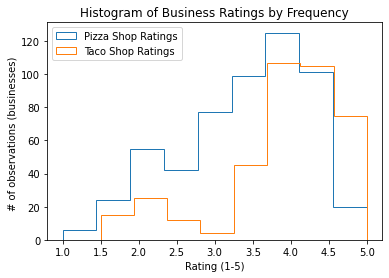

In [268]:
fig, ax = plt.subplots()

ax.hist(mp['biz_rating'], label="Pizza Shop Ratings", bins=9, histtype='step')
ax.hist(mt['biz_rating'], label= "Taco Shop Ratings", bins=8, histtype='step')

# Set the x-axis label to "Rating")"
ax.set_xlabel('Rating (1-5)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations (businesses) ')

ax.set_title('Histogram of Business Ratings by Frequency')

ax.legend(loc=2)
plt.savefig('histogram_ratings.png');

### The above graph indicates a sizeable gap between 2.5 and 4 stars when comparing pizza and taco shops. Essentially, for reviewed Taco shops in Austin they are either rated highly (4.0 and above) or hardly rated at all.


In [258]:
p_price_gone.groupby['biz_price']('biz_rating').

TypeError: 'method' object is not subscriptable

In [264]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(p_price_gone['biz_price'], p_price_gone['biz_rating'], c=pizza_tacos['category'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('biz_price ($$$)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('biz_ratings (1-5)')

ax.set_title('Relationship between price and rating')


plt.show()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      Pizza
1      Pizza
2      Pizza
3      Pizza
4      Pizza
       ...  
383    Tacos
384    Tacos
385    Tacos
386    Tacos
387    Tacos
Name: category, Length: 937, dtype: object

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 432x288 with 1 Axes>

##

Finding the number of pizza parlors by zipcode

In [ ]:
mi['biz_rating'].value_counts()

In [ ]:
mi=mi[:-1]
mi

In [ ]:
# Get total number of zipcodes
zip_lst=(mi['biz_rating'].unique()).tolist()
len(zip_lst)

In [ ]:
# Convert zipcodes in our list to strings
zip_lst_string=list(map(str, zip_lst))
zip_lst_string

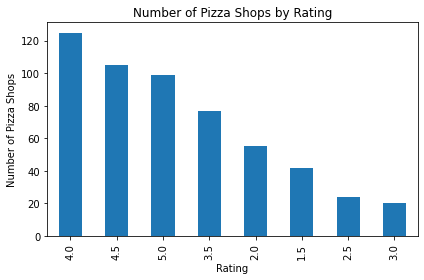

In [214]:
ax= mp['biz_rating'].value_counts().plot.bar(x='biz_rating')
ax= mt['biz_rating'].value_counts().plot.bar(x='biz_rating')

ax.set_title('Number of Pizza Shops by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Pizza Shops')

plt.tight_layout()
plt.savefig('data/Pizza_Shops_by_rating.png');

In [ ]:
searchfor = ['Domino', 'Cicis', 'Chuck', 'Papa', 'MOD', 'Caesars', 'California', 'Hut']
no_chains= mi[~mi.biz_name.str.contains('|'.join(searchfor))]

In [ ]:
mi['biz_name'].describe()

In [ ]:
no_chains['biz_name'].describe()

In [ ]:
#TOTAL NUMBER OF NON-CHAIN RESTAURANTS PER ZIPCODE
Without_Chains = no_chains['biz_rating'].value_counts()
#TOTAL NUMBER OF RESTAURANTS PER ZIPCODE
With_Chains = mi['biz_rating'].value_counts()
#INSERTING BOTH OBJECTS INTO A NEW DATAFRAME
df = pd.DataFrame({'Without Chains': Without_Chains,
                   'With Chains': With_Chains})
#PLOTTING THE DATAFRAME
ax = df.plot.bar(figsize=(10,5))

ax.set_title('Comparing Number of Non-Chain Restaurants Per Rating ')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Pizza Shops')
plt.tight_layout()
plt.savefig('data/Comp_Non_Pizza_Chains.png');

In [ ]:
# Sorts the number of pizzashops by zipcode and avgerage rating
biz_zipcodes= pd.DataFrame(mi.groupby('biz_price')['biz_rating'].mean())
#Add New Column Equal to The Number Of Pizza Shops 
biz_zipcodes['#_pizzashops']= mi['biz_price'].value_counts()
biz_zipcodes.sort_values(by=['#_pizzashops'])

In [ ]:
#Calling biz_zipcodes to check if cell above ran correctly
biz_zipcodes

In [ ]:
#Plotting Avg Biz Rating by Zip Code
axes = biz_zipcodes['biz_rating'].plot.bar(rot=90, x='biz_rating')
#Setting Chart Title
axes.set_title('Average Pizza Shop Rating by Zipcode')
#Setting X-axis label
axes.set_xlabel('Zipcode')
#Setting Y-axis label
axes.set_ylabel('Avg. Rating')

plt.tight_layout()
plt.savefig('data/Avg_Rtng_by_Zip.png');